In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

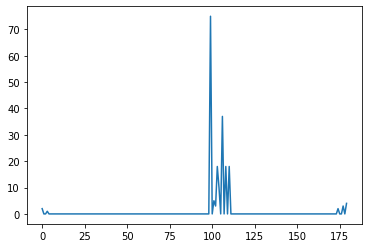

In [3]:
cap = cv.VideoCapture('slow_traffic_small.mp4')
ret, frame = cap.read()

x, y, width, height = 300, 200, 100, 50
track_window = (x, y, width, height)

roi = frame[y:y+height, x:x+width]
hsv_roi = cv.cvtColor(roi, cv.COLOR_BGR2HSV)

mask = cv.inRange(hsv_roi, np.array((0., 60., 32.)), np.array((180., 255., 255)))
#mask.shape = (50, 100)

roi_hist = cv.calcHist([hsv_roi], [0], mask, [180], [0,180])
plt.plot(roi_hist)

cv.normalize(roi_hist, roi_hist, 0, 255, cv.NORM_MINMAX)

term_crit = (cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 10, 1)
cv.imshow('roi', roi)

In [5]:
while(1):
    ret, frame = cap.read()
    if ret == True:
        
        hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
        dst = cv.calcBackProject([hsv], [0], roi_hist, [0,180], 1)
        
        ret, track_window = cv.meanShift(dst, track_window, term_crit)
        
        x, y, w, h = track_window
        final_image = cv.rectangle(frame, (x,y), (x+w, y+h), 255, 3)
        
        cv.imshow('dst', dst)
        cv.imshow('final_image', final_image)
        k = cv.waitKey(30) & 0xFF
        if k == 27:
            break
    
    else:
        break
cap.release()
cv.destroyAllWindows()